# Background

This file loads the bike and train routes, and plots them on a blank matplotlib file. This is in order to generate a simple svg route which can be used in many places.


In [1]:
import gpxpy
import matplotlib.pyplot as plt

BIRMINGHAM_COORDS = (-1.9018053, 52.4765926)
CAMBRIDGE_COORDS = (0.1297757, 52.2149504)
LEAMINGTON_COORDS = (-1.5338551, 52.2906101)
BEDFORD_COORDS = (-0.4723198, 52.1453833)

## Import bike routes


In [2]:
bike_route_names = ["BHM_TO_STR", "BIC_TO_BED", "BED_TO_SAN"]
bike_routes = {}
for route_name in bike_route_names:
    gpx_file = open(f"../data/bike/{route_name}.gpx", "r")
    gpx = gpxpy.parse(gpx_file)
    bike_routes[route_name] = gpx.tracks[0].segments[0].points

## Import train routes


In [3]:
train_route_names = ["STR_TO_LEA", "LEA_TO_BIC", "SAN_TO_CAM"]
train_routes = {}
for route_name in train_route_names:
    gpx_file = open(f"../data/train/{route_name}.gpx", "r")
    gpx = gpxpy.parse(gpx_file)
    train_routes[route_name] = gpx.tracks[0].segments[0].points

## Plot


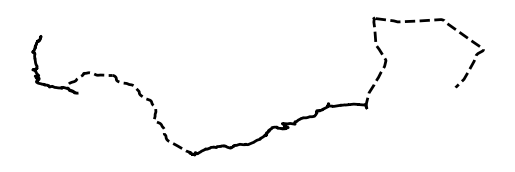

In [4]:
fig = plt.figure()
ax = fig.add_subplot(111)

for route_name, route in bike_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, "k-", lw=2)

for route_name, route in train_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, "k--", lw=2)

ax.set_aspect("equal")
plt.axis("off")
plt.show()

## Save


In [5]:
fig.patch.set_visible(False)
fig.savefig("../images/route.svg", format="svg", dpi=1200, bbox_inches="tight")

# Plot with more info


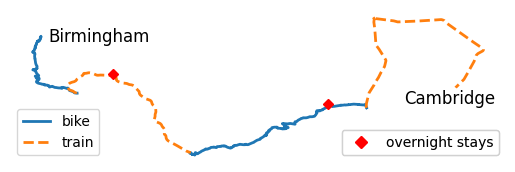

In [15]:
# plt.xkcd()
fig = plt.figure()
ax = fig.add_subplot(111)

bike_linestyle = {
    "color": "#1f77b4",
    "linewidth": 2,
    "linestyle": "-",
}

train_linestyle = {
    "color": "#ff7f0e",
    "linewidth": 2,
    "linestyle": "--",
}

for route_name, route in bike_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, **bike_linestyle)

for route_name, route in train_routes.items():
    xs = [point.longitude for point in route]
    ys = [point.latitude for point in route]
    ax.plot(xs, ys, **train_linestyle)

# label start and end points
ax.text(
    BIRMINGHAM_COORDS[0] + 0.05,
    BIRMINGHAM_COORDS[1],
    "Birmingham",
    horizontalalignment="left",
    verticalalignment="center",
    fontsize=12,
)
ax.text(
    CAMBRIDGE_COORDS[0],
    CAMBRIDGE_COORDS[1],
    "Cambridge",
    horizontalalignment="center",
    verticalalignment="top",
    fontsize=12,
)

# plot stayovers
for coords in [LEAMINGTON_COORDS, BEDFORD_COORDS]:
    ax.plot(coords[0], coords[1], "rD", markersize=5)

ax.set_aspect("equal")
# make custom legend with only "bike" and "train" lines
legend1 = ax.legend(
    [
        plt.Line2D([0], [0], **bike_linestyle),
        plt.Line2D([0], [0], **train_linestyle),
    ],
    ["bike", "train"],
    loc="lower left",
)
ax.add_artist(legend1)
# make custom legend with only "stayover" points
legend2 = ax.legend(
    [plt.Line2D([0], [0], color="r", marker="D", linestyle="None")],
    ["overnight stays"],
    loc="lower right",
)
ax.add_artist(legend2)
plt.axis("off")
plt.show()
fig.patch.set_visible(False)
fig.savefig("../images/route_descriptive.svg", format="svg", bbox_inches="tight")